In [1]:
import pandas as pd
import random
import os
import numpy as np

In [2]:
#훈련 데이터 / 테스트 데이터 파일 입력

train_path = r"C:\My_project\ML_jjh\card_train.csv"
test_path =  r"C:\My_project\ML_jjh\card_test.csv"

In [3]:
train_df = pd.read_csv(train_path)
y_train = train_df['Segment']

In [4]:
recommended_columns = [
    # 예시 처
    "남녀구분코드", "연령", "Life_Stage","회원여부_연체",
    "이용금액_할부_R12M","입회경과개월수_신용","월상환론한도금액","카드이용한도금액","증감율_이용금액_체크_전월","이용금액_일시불_R12M",
    "포인트_이용포인트_R12M","이용건수_체크_R12M","이용건수_신용_R12M","유효카드수_신용체크","이용금액_체크_R12M",
    "불만제기후경과월_R12M","RP후경과월","_1순위카드이용금액","포인트_적립포인트_R12M",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종","_1순위카드이용건수","월중평잔",
     "_2순위업종_이용금액", "_2순위업종","_2순위카드이용금액","_2순위교통업종","_2순위쇼핑업종",
    "증감율_이용건수_신용_분기","CA한도금액","변동률_일시불평잔","강제한도감액금액_R12M","일시상환론한도금액",
    "변동률_할부평잔","상향가능한도금액","카드론이용건수_누적","이용건수_할부_R12M","정상청구원금_B5M","이용개월수_체크_R12M",
    "연체입금원금_B5M","정상입금원금_B5M","이용개월수_할부_R12M","최초카드론이용경과월",
    "연체일수_최근",
    "최종이용일자_기본",
    "컨택건수_이용유도_TM_R6M",
    "증감율_이용건수_체크_전월",
    "마케팅동의여부",
    "연체원금_최근",
    "이용금액_체크_B0M",
    "최종카드발급경과월",
    "수신거부여부_SMS",
    "RP건수_렌탈_B0M",
]

In [5]:
#NaN인 컬럼 확인

X = train_df[recommended_columns]

nan_cols = [x for x in X.columns if x not in train_df.columns]
print(nan_cols)

[]


In [6]:
#선택한 피처만 훈련데이터로 만
X = train_df[recommended_columns]

In [7]:
#object인 컬럼만 만드는 리스트 컴프리핸션
oj_columns = [x for x in X.columns if X[x].dtype == "object"]
oj_columns

['연령',
 'Life_Stage',
 '_1순위업종',
 '_1순위쇼핑업종',
 '_1순위교통업종',
 '_2순위업종',
 '_2순위교통업종',
 '_2순위쇼핑업종']

In [8]:
from sklearn.preprocessing import LabelEncoder

#전처리 함수
def preprocessing(df):
    oj_columns = [x for x in df.columns if df[x].dtype == "object"]
    for cate in oj_columns:
        # df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저  ###다름(과적함 오지게 의심됨)####
        le = LabelEncoder()
        df[cate] = le.fit_transform(df[cate])

    return df

In [9]:
#X를 전처리 한다
x_train = preprocessing(X)
x_train

C:\Users\82105\AppData\Local\Temp\ipykernel_14136\4288052798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저
C:\Users\82105\AppData\Local\Temp\ipykernel_14136\4288052798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate])
C:\Users\82105\AppData\Local\Temp\ipykernel_14136\4288052798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,연체일수_최근,최종이용일자_기본,컨택건수_이용유도_TM_R6M,증감율_이용건수_체크_전월,마케팅동의여부,연체원금_최근,이용금액_체크_B0M,최종카드발급경과월,수신거부여부_SMS,RP건수_렌탈_B0M
0,2,4,1,0,0,39,180503,100009,0.000000,8166,...,-999999,20180714,1,0.000000,0,0,0,6,1,0
1,1,1,0,0,0,39,0,41180,0.000000,41278,...,-999999,20181130,0,0.000000,1,0,0,49,1,0
2,2,3,5,0,0,172,206098,40798,0.000000,2979,...,-999999,20180110,5,0.000000,1,0,0,26,1,0
3,2,4,1,0,24373,202,206308,29999,0.000000,37780,...,-999999,20180911,1,0.000000,1,0,0,22,0,0
4,2,1,4,0,15966,3,93789,18989,0.002695,2248,...,-999999,20180921,2,-0.210627,1,0,3180,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,2,4,0,3982,11,151553,30003,0.000000,22659,...,-999999,20171127,0,0.000000,1,0,0,17,0,0
70556,1,3,5,0,0,278,0,52017,0.000000,25655,...,-999999,20180723,0,0.000000,0,0,0,52,1,0
70557,2,4,3,0,28782,191,205060,41444,0.000000,27394,...,-999999,20180721,0,0.000000,1,0,0,13,0,0
70558,2,3,3,0,0,105,160705,50371,0.000000,952,...,-999999,20180709,0,0.000000,1,0,0,13,0,0


In [10]:
#모델 학습 및 앙상블 예측
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#변수 재정의
X = x_train
y = y_train

In [11]:
#라벨 인코
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [12]:
#불균형 확인

y = pd.Series(y)

print(y.value_counts())
print(y.value_counts(normalize=True))

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64
4    0.800808
3    0.145550
2    0.053189
0    0.000397
1    0.000057
Name: proportion, dtype: float64


C:\Users\82105\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82105\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82105\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82105\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82105\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

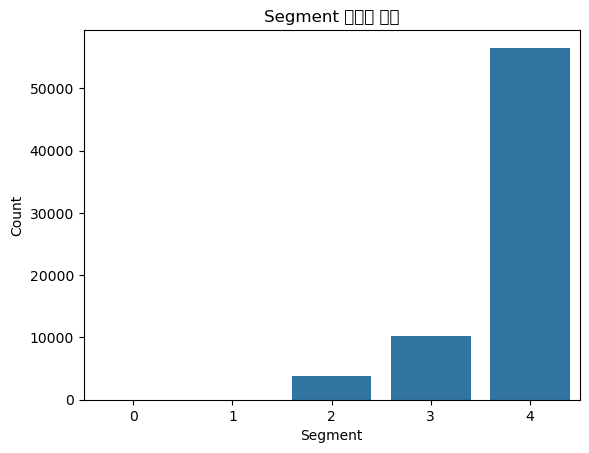

In [13]:
#Segment 클래스 분류 시각화 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [14]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [15]:
#SMOTE + RandomOverSampler 조합

from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import pandas as pd

# 1. SMOTE로 클래스 2, 3 보완
smote = SMOTE(
    # sampling_strategy={2: 40000, 3: 45000},  # 원하는 수치로 증강
    sampling_strategy={2: 7000, 3: 11000},
    random_state=42
)
X_sm, y_sm = smote.fit_resample(X, y)

# 2. RandomOverSampler로 클래스 0, 1 복제
ros = RandomOverSampler(
    # sampling_strategy={0: 25000, 1: 20000},  # 최소 1,000개로 맞춤
    sampling_strategy={0: 1000, 1: 500},
    random_state=42
)
X_resampled, y_resampled = ros.fit_resample(X_sm, y_sm)

# 확인
print("클래스 분포:")
print(pd.Series(y_resampled).value_counts())


클래스 분포:
4    56505
3    11000
2     7000
0     1000
1      500
Name: count, dtype: int64


In [16]:
# 하이퍼 파라미터 튜닝 및 앙상블

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np

# 1. 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 2. F1 scorer 정의
f1_macro = make_scorer(f1_score, average='macro')

# 3. XGBoost 튜닝
xgb = XGBClassifier(n_estimators=300,
                    max_depth=5,
                    use_label_encoder=False,
                    eval_metric='mlogloss',
                    learning_rate=0.1,
                    random_state=42
)

xgb.fit(X_train, y_train)

# 4. LightGBM 튜닝
lgb = LGBMClassifier(n_estimators=300,
                     max_depth=5,
                     learning_rate=0.1,
                     random_state=42
)

lgb.fit(X_train, y_train)

# 5. CatBoost 기본 (튜닝은 선택)
cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat.fit(X_train, y_train)

# 6. soft voting 예측
xgb_proba = xgb.predict_proba(X_val)
lgb_proba = lgb.predict_proba(X_val)
cat_proba = cat.predict_proba(X_val)

ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
ensemble_pred = np.argmax(ensemble_proba, axis=1)  # 가장 큰 값 반환

# 7. 평가
print("F1 Score (macro):", f1_score(y_val, ensemble_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_val, ensemble_pred, average='weighted'))
print("\n📊 Classification Report:")
print(classification_report(y_val, ensemble_pred))


C:\Users\82105\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:30:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7442
[LightGBM] [Info] Number of data points in the train set: 60804, number of used features: 54
[LightGBM] [Info] Start training from score -4.330799
[LightGBM] [Info] Start training from score -5.023946
[LightGBM] [Info] Start training from score -2.384889
[LightGBM] [Info] Start training from score -1.932904
[LightGBM] [Info] Start training from score -0.296470
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [17]:
#Kfold교차검증
#과적합인지 확인합니다

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier
import numpy as np

In [19]:
f1_macro = make_scorer(f1_score, average='macro')

In [20]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [21]:
model_xgb = xgb
model_lgb = lgb
model_cat = cat

In [22]:
# scores_xgb = cross_val_score(
#     model_xgb,
#     X_resampled, y_resampled,
#     scoring=f1_macro,
#     cv=cv,
#     n_jobs=-1,  # 병렬 처리
#     verbose=1
# )

# scores_lgb = cross_val_score(
#     model_lgb,
#     X_resampled, y_resampled,
#     scoring=f1_macro,
#     cv=cv,
#     n_jobs=-1,  # 병렬 처리
#     verbose=1
# )

# scores_cat = cross_val_score(
#     model_cat,
#     X_resampled, y_resampled,
#     scoring=f1_macro,
#     cv=cv,
#     n_jobs=-1,  # 병렬 처리
#     verbose=1
# )

# print("------------XGB----------------")
# print("Fold별 F1 (macro):", scores_xgb)
# print("평균 F1 (macro):", np.mean(scores_xgb))
# print("------------LGB----------------")
# print("Fold별 F1 (macro):", scores_lgb)
# print("평균 F1 (macro):", np.mean(scores_lgb))
# print("------------CAT----------------")
# print("Fold별 F1 (macro):", scores_cat)
# print("평균 F1 (macro):", np.mean(scores_cat))

In [23]:
##예측 및 결과 저장
x_new = pd.read_csv(test_path)

x_new = preprocessing(x_new)

x_new = x_new[recommended_columns]

def predict_test(X_test):
    xgb_p = xgb.predict_proba(X_test)
    lgb_p = lgb.predict_proba(X_test)
    cat_p = cat.predict_proba(X_test)
    final_p = (xgb_p + lgb_p + cat_p) / 3
    return np.argmax(final_p, axis=1)

submission = pd.read_csv(r"C:\My_project\ML_jjh\card_test_submission.csv")


submission = submission.drop(columns=["Unnamed: 0"])


submission['Segment'] = pd.Series(predict_test(x_new)).replace({0:'A', 1:'B', 2:'C', 3:'D', 4:'E'})


submission.to_csv(r"C:\My_project\ML_jjh\증강수치 낮춤.csv", index=False)